Найден минимум функции: f(0.9866508777197189) = -5.415323822265886


┌ Info: Saved animation to c:\Users\Golum\Desktop\iu9-education\optimization-methods\letuchka-14-04-2025\genetic_algorithm_gradient.gif
└ @ Plots C:\Users\Golum\.julia\packages\Plots\kLeqV\src\animation.jl:156
GKS: Colour is invalid in routine SET_COLOR_REP
GKS: Colour is invalid in routine SET_COLOR_REP
GKS: Colour is invalid in routine SET_COLOR_REP


Plots.AnimatedGif("c:\\Users\\Golum\\Desktop\\iu9-education\\optimization-methods\\letuchka-14-04-2025\\genetic_algorithm_gradient.gif")
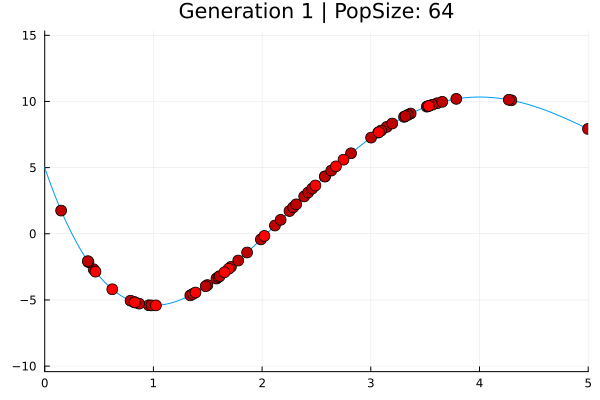

In [21]:
using Plots, Random, Colors

f(x) = 5 - 24x + 17x^2 - (11/3)x^3 + (1/4)x^4

struct Individual
    x::Float64
    age::Int
    max_age::Int
    fitness::Float64
end

function initialize_population(size, x_min, x_max, min_age, max_age)
    pop = [create_individual(rand() * (x_max - x_min) + x_min, 0, min_age, max_age, []) for _ in 1:size]
    return pop
end

function create_individual(x, age, min_age, max_age, f_values)
    fit = f(x)
    ma = compute_max_age(fit, f_values, min_age, max_age)
    return Individual(x, age, ma, fit)
end

function compute_max_age(fit, f_values, min_age, max_age)
    if isempty(f_values)
        return min_age + (max_age - min_age) ÷ 2
    end
    f_min, f_max = extrema(f_values)
    normalized = f_max != f_min ? (f_max - fit) / (f_max - f_min) : 0.5
    return min_age + round(Int, normalized * (max_age - min_age))
end

x_min = 0.0
x_max = 5.0
p = 0.27
mutation_strength = 0.04
min_age = 1
max_age_param = 5
initial_pop_size = 50
generations = 50
max_pop_size = 1000

Random.seed!(42)
pop = initialize_population(initial_pop_size, x_min, x_max, min_age, max_age_param)

anim = @animate for gen in 1:generations
    global pop

    pop = [Individual(ind.x, ind.age + 1, ind.max_age, ind.fitness) for ind in pop]
    alive = [ind for ind in pop if ind.age <= ind.max_age]
    dead = [ind for ind in pop if ind.age > ind.max_age]
    pop_size_current = length(alive)

    aux_pop_size = round(Int, pop_size_current * p)
    f_values = [ind.fitness for ind in alive]
    aux_pop = []

    if !isempty(alive)
        for _ in 1:aux_pop_size
            parents = rand(alive, 2)
            α = rand()
            x_child = α * parents[1].x + (1 - α) * parents[2].x
            x_child += randn() * mutation_strength
            x_child = clamp(x_child, x_min, x_max)
            push!(aux_pop, create_individual(x_child, 0, min_age, max_age_param, f_values))
        end
    end

    pop = vcat(alive, aux_pop)
    if length(pop) > max_pop_size
        pop = sort(pop, by = x -> x.fitness)
        pop = pop[1:max_pop_size]
    end

    plot_x = range(x_min, x_max, length=200)
    plot_f = f.(plot_x)
    plt = plot(plot_x, plot_f, label="f(x)", xlim=(x_min, x_max),
               ylim=(minimum(plot_f)-5, maximum(plot_f)+5), legend=false)

    for ind in pop
        t = clamp(1.0 - ind.age / (ind.max_age + 1), 0.0, 1.0)
        col = RGB(t, 0.0, 0.0)
        scatter!(plt, [ind.x], [ind.fitness], color=col, markersize=6)
    end

    title!("Generation $gen | PopSize: $(length(pop))")
end

best = pop[argmin([ind.fitness for ind in pop])]
println("Найден минимум функции: f($(best.x)) = $(best.fitness)")

gif(anim, "genetic_algorithm_gradient.gif", fps=2)